# Please double check for errors or misinterpretations ~Kailash

In [2]:
from bigdata_a3_utils import *
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from pathlib import Path

In [3]:
def get_needed_cols(base_path, category, frame):
    #columns we want
    needed= ["rating", "main_category", "brand", "year", "review_length", "helpful_vote", "verified_purchase"]
    #read in pickle file
    df= pd.read_pickle(base_path / f"cleaned_data_{category}.pkl")
    #drop everything but the columns we want
    subset= df[needed]
    #clear large pickle file from memory
    del df
    #concat into unified dataframe
    frame= pd.concat([frame, subset])

    del subset
    return frame
    

In [15]:
base_path= Path(r"C:\Users\saeed\OneDrive\Desktop")
temp_unified= pd.DataFrame()

# run after test is successful
# for category in VALID_CATEGORIES:
#     temp_unified= get_needed_cols(base_path, category, temp_unified)

#test run. Please run this to ensure you are getting the categories in the list below
#Once working, comment test code and uncomment real code and then Run All
categories= ["Amazon_Fashion", "All_Beauty"]
for category in categories:
    temp_unified= get_needed_cols(base_path, category, temp_unified)

test= temp_unified["main_category"].unique()
print(test)

['AMAZON FASHION']


In [6]:
temp_unified.head(1)

,rating,main_category,brand,year,review_length,helpful_vote,verified_purchase
0,5.0,AMAZON FASHION,CHUVORA,2020,58,3,True


# Star Rating

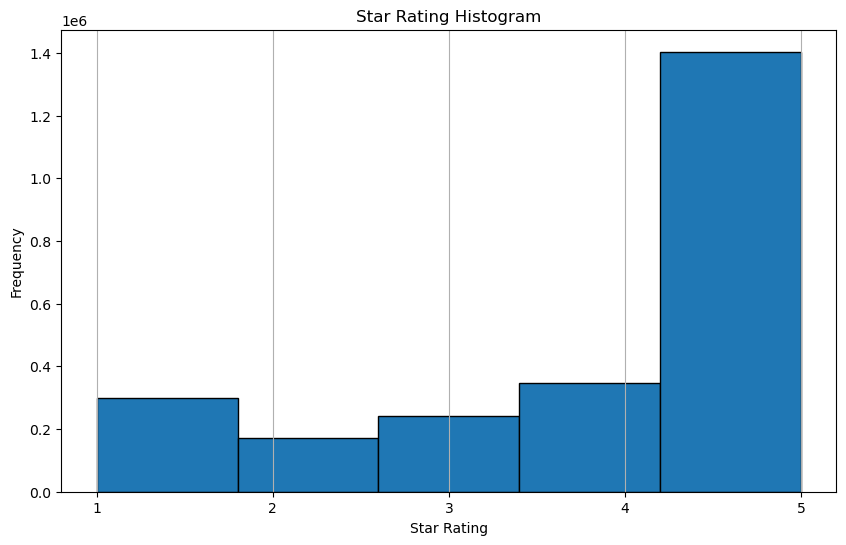

In [7]:

plt.figure(figsize=(10, 6))
temp_unified['rating'].hist(bins=5, edgecolor='black')
plt.title('Star Rating Histogram')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(axis='y')
plt.show()

# Top 10 Categories

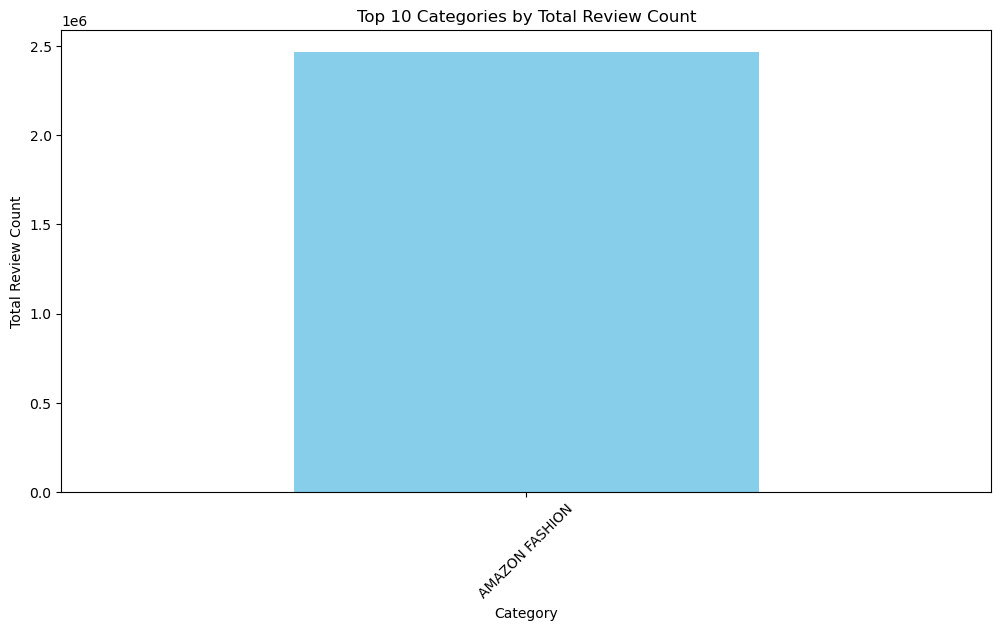

In [8]:
top_categories = temp_unified['main_category'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories by Total Review Count')
plt.xlabel('Category')
plt.ylabel('Total Review Count')
plt.xticks(rotation=45)
plt.show()

# Top 10 brands excluding Unknown

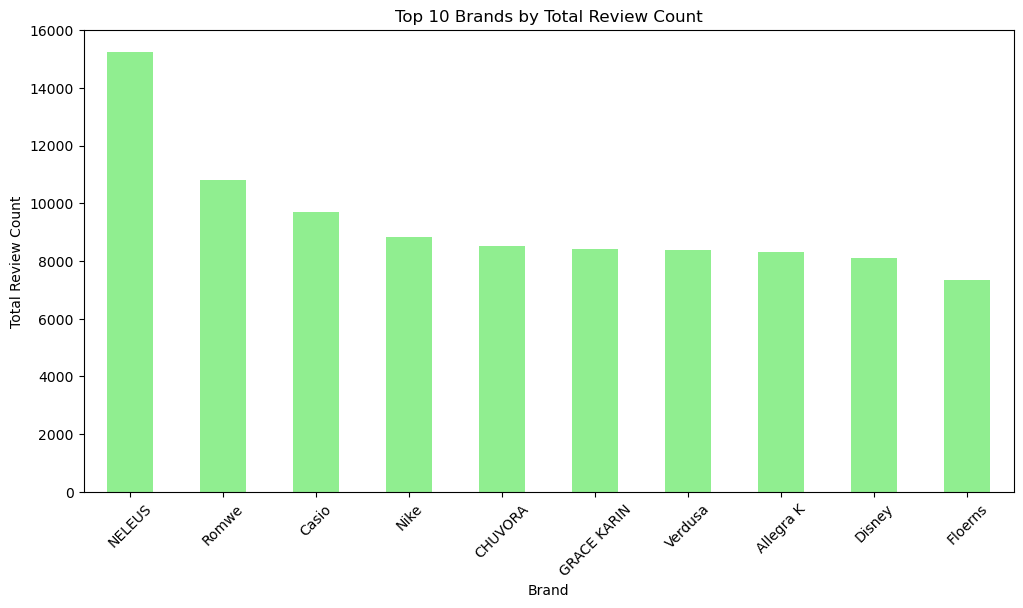

In [9]:
top_brands = temp_unified[temp_unified['brand'] != 'Unknown']['brand'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_brands.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Brands by Total Review Count')
plt.xlabel('Brand')
plt.ylabel('Total Review Count')
plt.xticks(rotation=45)
plt.show()

# Average rating per year

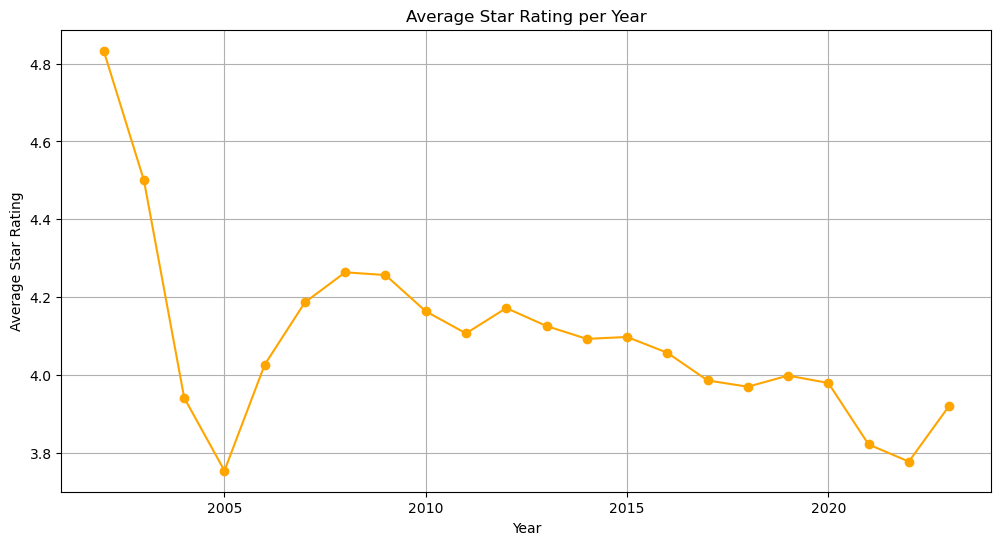

In [10]:

average_rating_per_year = temp_unified.groupby('year')['rating'].mean()

plt.figure(figsize=(12, 6))
average_rating_per_year.plot(kind='line', marker='o', color='orange')
plt.title('Average Star Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Star Rating')
plt.grid()
plt.show()

# Correlation

In [11]:
correlation = temp_unified['review_length'].corr(temp_unified['rating'])
print(f'Pearson correlation between review length and star rating: {correlation:.2f}')

Pearson correlation between review length and star rating: -0.06


# Distribution of helpful vote counts

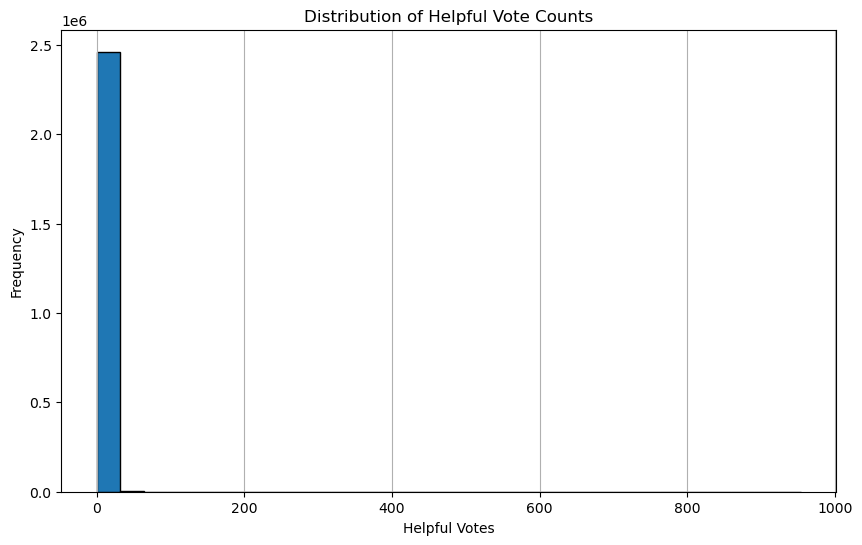

In [12]:
plt.figure(figsize=(10, 6))
temp_unified['helpful_vote'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Helpful Vote Counts')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Relationship between verified purchase and star rating

C:\Users\saeed\AppData\Local\Temp\ipykernel_22524\1775942050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='verified_purchase', y='rating', data=temp_unified, palette='Set2')


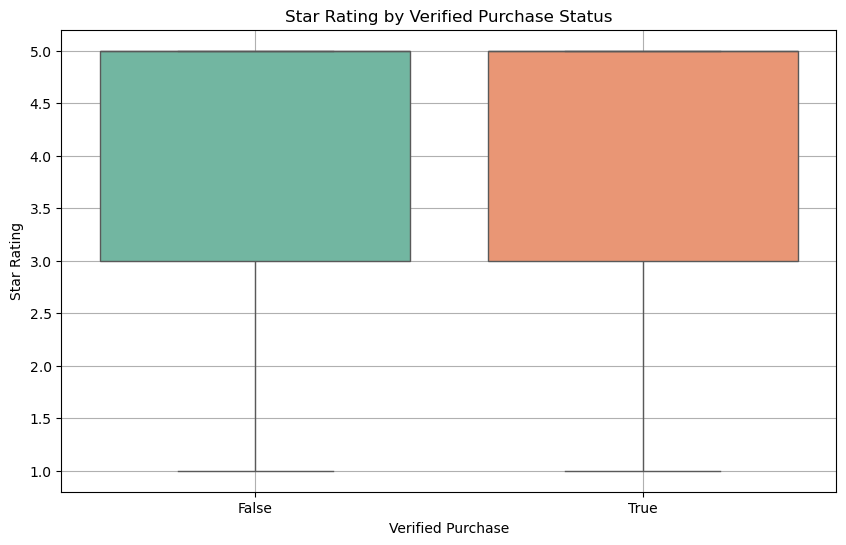

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='verified_purchase', y='rating', data=temp_unified, palette='Set2')
plt.title('Star Rating by Verified Purchase Status')
plt.xlabel('Verified Purchase')
plt.ylabel('Star Rating')
plt.grid()
plt.show()